In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import Holt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import statsmodels.graphics.tsaplots as tsa_plots
import statsmodels.tsa.statespace as tm_models
from datetime import datetime,time
import warnings
import itertools
import matplotlib
from pylab import rcParams
from statsmodels.tsa.arima_model import ARIMA
from matplotlib import pyplot
from sklearn.metrics import mean_squared_error
import statsmodels.formula.api as smf

In [3]:
# Importing the Dataset
coca = pd.read_excel("CocaCola_Sales_Rawdata.xlsx")
coca.head()

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996


In [4]:
coca1=coca.copy()

In [5]:
coca1.head().T

,0,1,2,3,4
Quarter,Q1_86,Q2_86,Q3_86,Q4_86,Q1_87
Sales,1734.83,2244.96,2533.8,2154.96,1547.82


In [6]:
coca1.isnull().sum()

Quarter    0
Sales      0
dtype: int64

In [7]:
coca1.dtypes

Quarter     object
Sales      float64
dtype: object

In [8]:
coca1.describe().T

,count,mean,std,min,25%,50%,75%,max
Sales,42.0,2994.353308,977.930896,1547.818996,2159.714247,2782.376999,3609.25,5253.0


In [11]:
temp = coca1.Quarter.str.replace(r'(Q\d)_(\d+)', r'19\2-\1')

In [12]:
coca1['quarter']=pd.to_datetime(temp).dt.strftime('%b-%Y')

In [14]:
coca1.head()

,Quarter,Sales,quarter
0,Q1_86,1734.827000,Jan-1986
1,Q2_86,2244.960999,Apr-1986
2,Q3_86,2533.804993,Jul-1986
3,Q4_86,2154.962997,Oct-1986
4,Q1_87,1547.818996,Jan-1987


In [15]:
coca1 = coca1.drop(['Quarter'], axis=1)

In [16]:
coca1.reset_index(inplace=True)

In [17]:
coca1['quarter'] = pd.to_datetime(coca1['quarter'])

In [19]:
coca1 = coca1.set_index('quarter')

In [20]:
coca1.head()

,index,Sales
quarter,,
1986-01-01,0,1734.827000
1986-04-01,1,2244.960999
1986-07-01,2,2533.804993
1986-10-01,3,2154.962997
1987-01-01,4,1547.818996


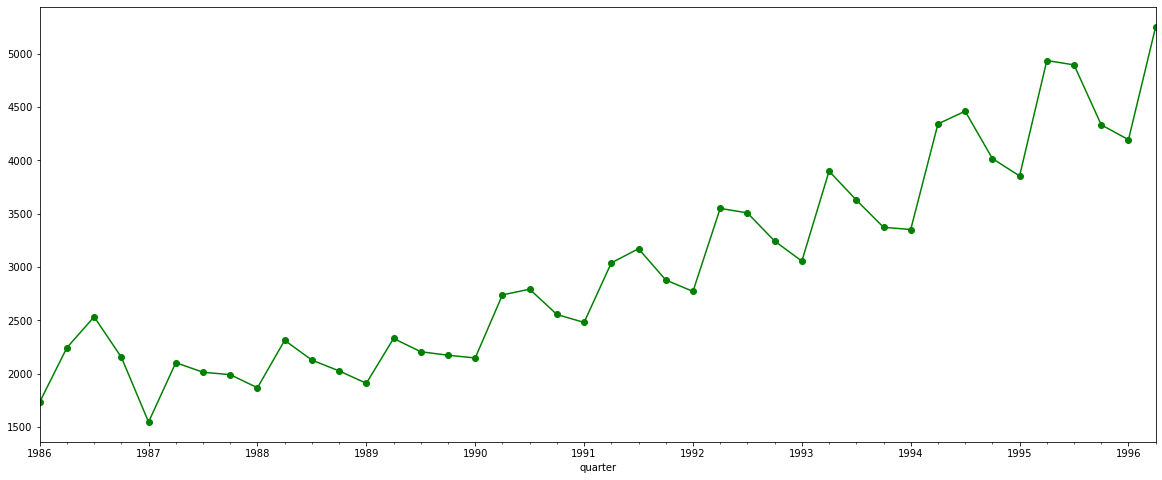

In [21]:
coca1['Sales'].plot(figsize=(20, 8),color='green', marker='o')
plt.show()

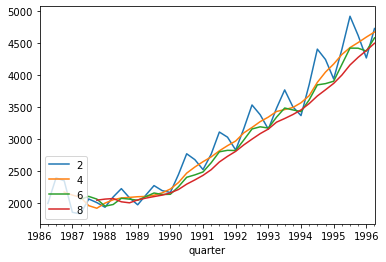

In [22]:
for i in range(2,10,2):
    coca1["Sales"].rolling(i).mean().plot(label=str(i))
plt.legend(loc=3)

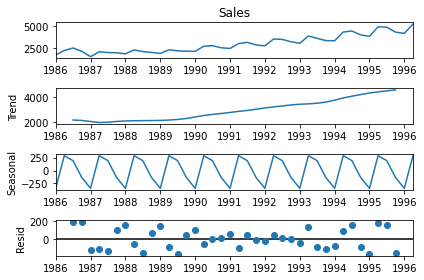

In [23]:
ts_add = seasonal_decompose(coca1.Sales,model="additive")
fig = ts_add.plot()
plt.show()

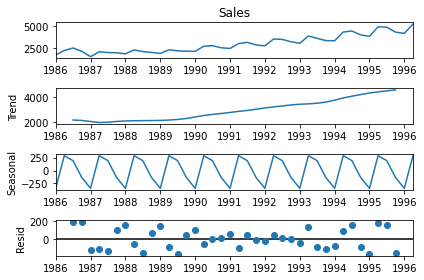

In [24]:
ts_mul = seasonal_decompose(coca1.Sales,model="multiplicative")
fig = ts_add.plot()
plt.show()

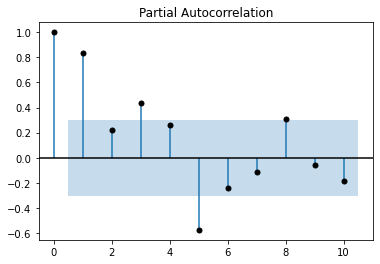

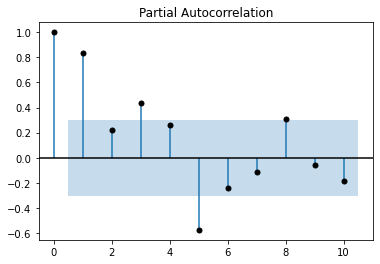

In [25]:
tsa_plots.plot_pacf(coca1.Sales, lags=10, color='black')

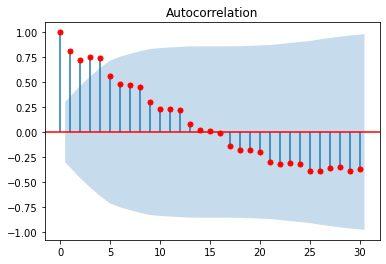

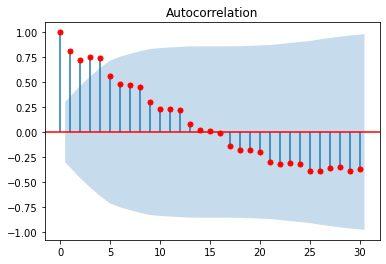

In [26]:
tsa_plots.plot_acf(coca1.Sales, lags=30, color='red')

In [27]:
# Building Time Series Forecasting with ARIMA


In [28]:
X = coca1['Sales'].values

In [29]:
size = int(len(X) * 0.66) 

In [30]:
train, test = X[0:size] , X[size:len(X)]

In [31]:
model = ARIMA(train, order=(5,1,0))

C:\Users\Hp\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


In [32]:
model_fit = model.fit(disp=0)

In [33]:
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                   26
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -172.036
Method:                       css-mle   S.D. of innovations            163.191
Date:                Thu, 30 Jun 2022   AIC                            358.071
Time:                        02:35:53   BIC                            366.878
Sample:                             1   HQIC                           360.607
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         41.8434     26.509      1.578      0.114     -10.113      93.799
ar.L1.D.y     -0.1479      0.195     -0.758      0.448      -0.530       0.234
ar.L2.D.y     -0.3127      0.157     -1.996      0.0

In [34]:
# This summarizes the coefficient values used as well as the skill of the fit on the in-sample observations

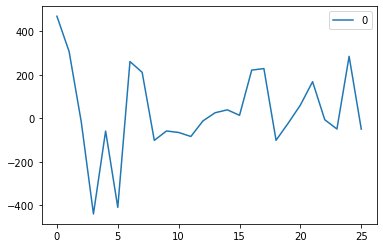

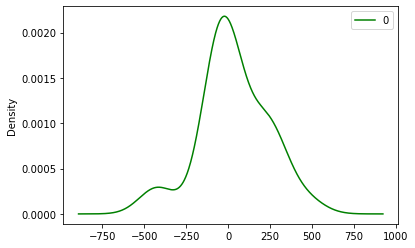

                0
count   26.000000
mean    31.325878
std    202.029702
min   -438.904389
25%    -58.603106
50%     -9.190229
75%    200.236018
max    468.290585


In [36]:
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
residuals.plot(kind='kde',color='green')
pyplot.show()
print(residuals.describe())

In [37]:
# The plot of the residual errors suggests that there may still be some trend information not captured by the model

In [38]:
# The results show that indeed there is a bias in the prediction (a non-zero mean in the residuals)

####  Rolling Forecast ARIMA model

In [39]:
history = [x for x in train]

In [40]:
predictions = list()

In [41]:
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))

C:\Users\Hp\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


predicted=3135.586029, expected=3243.859993
predicted=3188.847068, expected=3056.000000
predicted=3734.224502, expected=3899.000000
predicted=3782.620891, expected=3629.000000
predicted=3355.125969, expected=3373.000000
predicted=3297.218120, expected=3352.000000
predicted=4112.813891, expected=4342.000000
predicted=3961.043678, expected=4461.000000
predicted=4130.787225, expected=4017.000000
predicted=3912.794182, expected=3854.000000
predicted=4687.043733, expected=4936.000000
predicted=4970.516924, expected=4895.000000
predicted=4384.040534, expected=4333.000000
predicted=4207.687405, expected=4194.000000
predicted=5261.673040, expected=5253.000000


C:\Users\Hp\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '


In [42]:
error = mean_squared_error(test, predictions)
print('Test MSE: %0.3f' %error)

Test MSE: 31525.273


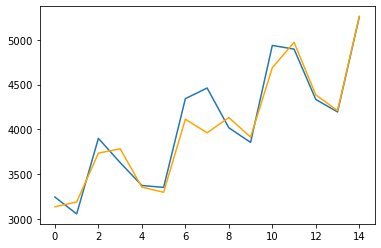

In [43]:
pyplot.plot(test)
pyplot.plot(predictions, color='orange')
pyplot.show()

In [44]:
# A line plot is created showing the expected values (blue) compared to the rolling forecast predictions(red). We can see the values , they show some trend and are in the correct sale

###  Comparing Multiple Models

In [45]:
coca2 = pd.get_dummies(coca, columns = ['Quarter'])

In [47]:
coca2.columns = ['Sales','Q1','Q1','Q1','Q1','Q1','Q1','Q1','Q1','Q1','Q1','Q1','Q2','Q2','Q2','Q2','Q2','Q2','Q2','Q2','Q2','Q2','Q2','Q3','Q3','Q3','Q3','Q3','Q3','Q3','Q3','Q3','Q3','Q4','Q4','Q4','Q4','Q4','Q4','Q4','Q4','Q4','Q4']

In [48]:
coca2.head().T

,0,1,2,3,4
Sales,1734.827,2244.960999,2533.804993,2154.962997,1547.818996
Q1,1.000,0.000000,0.000000,0.000000,0.000000
Q1,0.000,0.000000,0.000000,0.000000,1.000000
Q1,0.000,0.000000,0.000000,0.000000,0.000000
Q1,0.000,0.000000,0.000000,0.000000,0.000000
Q1,0.000,0.000000,0.000000,0.000000,0.000000
Q1,0.000,0.000000,0.000000,0.000000,0.000000
Q1,0.000,0.000000,0.000000,0.000000,0.000000
Q1,0.000,0.000000,0.000000,0.000000,0.000000
Q1,0.000,0.000000,0.000000,0.000000,0.000000


In [50]:
t = np.arange(1,43)

In [51]:
coca2['t'] = t

In [53]:
coca2['t_sq'] = coca2['t']*coca2['t']

In [54]:
log_Sales = np.log(coca2['Sales'])

In [55]:
coca2['log_Sales']=log_Sales

In [56]:
coca2.head().T

,0,1,2,3,4
Sales,1734.827000,2244.960999,2533.804993,2154.962997,1547.818996
Q1,1.000000,0.000000,0.000000,0.000000,0.000000
Q1,0.000000,0.000000,0.000000,0.000000,1.000000
Q1,0.000000,0.000000,0.000000,0.000000,0.000000
Q1,0.000000,0.000000,0.000000,0.000000,0.000000
Q1,0.000000,0.000000,0.000000,0.000000,0.000000
Q1,0.000000,0.000000,0.000000,0.000000,0.000000
Q1,0.000000,0.000000,0.000000,0.000000,0.000000
Q1,0.000000,0.000000,0.000000,0.000000,0.000000
Q1,0.000000,0.000000,0.000000,0.000000,0.000000


In [57]:
train1, test1 = np.split(coca2, [int(0.67 * len(coca2))])

In [59]:
linear = smf.ols('Sales ~ t',data=train1).fit()
predlin = pd.Series(linear.predict(pd.DataFrame(test1['t'])))
rmselin = np.sqrt((np.mean(np.array(test1['Sales'])-np.array(predlin))**2))
rmselin

580.1224130918641

In [63]:
quad = smf.ols('Sales~t+t_sq',data=train1).fit()
predquad = pd.Series(quad.predict(pd.DataFrame(test1[['t','t_sq']])))
rmsequad = np.sqrt((np.mean(np.array(test1['Sales'])-np.array(predquad))**2))
rmsequad

630.2531421090096

In [66]:
expo = smf.ols('log_Sales~t',data=train1).fit()
predexp = pd.Series(expo.predict(pd.DataFrame(test1['t'])))
rmseexpo = np.sqrt(np.mean((np.array(test1['Sales'])-np.array(np.exp(predexp)))**2))
rmseexpo

588.1405104900134

In [67]:
additive = smf.ols('Sales~Q1+Q2+Q3+Q4', data=train1).fit()
predadd = pd.Series(additive.predict(pd.DataFrame(test1[['Q1','Q2','Q3','Q4']])))
rmseadd = np.sqrt(np.mean((np.array(test1['Sales'])-np.array(predadd))**2))
rmseadd

1869.7188209186947

In [68]:
addlinear = smf.ols('Sales~t+Q1+Q2+Q3+Q4', data=train1).fit()
predaddlinear = pd.Series(addlinear.predict(pd.DataFrame(test1[['t','Q1','Q2','Q3','Q4']])))
rmseaddlinear = np.sqrt(np.mean((np.array(test1['Sales'])-np.array(predaddlinear))**2))
rmseaddlinear

596.1526282372472

In [69]:
addquad = smf.ols('Sales~t+t_sq+Q1+Q2+Q3+Q4', data=train1).fit()
predaddquad = pd.Series(addquad.predict(pd.DataFrame(test1[['t','t_sq','Q1','Q2','Q3','Q4']])))
rmseaddquad = np.sqrt(np.mean((np.array(test1['Sales'])-np.array(predaddquad))**2))
rmseaddquad

412.1144436053775

In [74]:
mulsea = smf.ols('log_Sales~Q1+Q2+Q3+Q4', data=train1).fit()
predmul = pd.Series(mulsea.predict(pd.DataFrame(test1[['Q1','Q2','Q3','Q4']])))
rmsemul = np.sqrt(np.mean((np.array(test1['Sales'])-np.array(np.exp(predmul)))**2))
rmsemul

2374.9194407954374

In [75]:
mullin = smf.ols('log_Sales~t+Q1+Q2+Q3+Q4', data=train1).fit()
predmullin = pd.Series(mullin.predict(pd.DataFrame(test1[['t','Q1','Q2','Q3','Q4']])))
rmsemullin = np.sqrt(np.mean((np.array(test1['Sales'])-np.array(np.exp(predmullin)))**2))
rmsemullin

5359.687911932085

In [77]:
mul_quad = smf.ols('log_Sales~t+t_sq+Q1+Q2+Q3+Q4', data=train1).fit()
pred_mul_quad = pd.Series(mul_quad.predict(pd.DataFrame(test1[['t','t_sq','Q1','Q2','Q3','Q4']])))
rmse_mul_quad = np.sqrt(np.mean((np.array(test1['Sales'])-np.array(np.exp(pred_mul_quad)))**2))
rmse_mul_quad

3630.5619467347524

###  Conclusion

In [79]:
output = {'Model':pd.Series(['rmse_mul_quad','rmseadd','rmseaddlinear','rmseaddquad','rmseexpo','rmselin','rmsemul','rmsemullin','rmsequad']),
          'Values':pd.Series([rmse_mul_quad,rmseadd,rmseaddlinear,rmseaddquad,rmseexpo,rmselin,rmsemul,rmsemullin,rmsequad])}

In [80]:
rmse=pd.DataFrame(output)

In [81]:
print(rmse)

           Model       Values
0  rmse_mul_quad  3630.561947
1        rmseadd  1869.718821
2  rmseaddlinear   596.152628
3    rmseaddquad   412.114444
4       rmseexpo   588.140510
5        rmselin   580.122413
6        rmsemul  2374.919441
7     rmsemullin  5359.687912
8       rmsequad   630.253142


#### Additive seasonalibilty with quadratic trend has the best RMSE values